In [344]:
import csv
import random
import os
from sklearn.preprocessing import RobustScaler, MinMaxScaler, normalize
import scipy
from scipy.signal import savgol_filter, butter, lfilter, ShortTimeFFT
from scipy.signal.windows import gaussian, triang, hamming

import matplotlib.pyplot as plt
import numpy as np

In [345]:
filename = os.path.join('.', 'AudioMNIST', 'data', '01', str(random.randint(0, 9)) + '_01_' + str(random.randint(0, 49)) + '.wav')
print(filename)

./AudioMNIST/data/01/6_01_14.wav


теперь попробуем удалить один канал и прослушать его

In [346]:
req_len = 0.6
with open(filename, 'rb') as f:
  read_file = f.read()
  header_size = int.from_bytes(read_file[16:20], 'little')
  num_channels = int.from_bytes(read_file[22:24], 'little')
  data_pos = read_file.find(bytes('data', encoding='utf8')) + 8
  bits_per_sample = int.from_bytes(read_file[34:36], 'little')

  rate = int.from_bytes(read_file[24:28], 'little')
  data = [int.from_bytes(read_file[i:i+bits_per_sample//8], "little", signed=True) for i in range(data_pos, len(read_file), 2)]
  # data_norm = normalize([[int.from_bytes(read_file[i:i+2], "little", signed=True) for i in range(data_pos, len(read_file), 2)]])[0]
  # data = normalize([[int.from_bytes(read_file[i:i+2], "little", signed=True) for i in range(data_pos, len(read_file), 2)]])[0]
  print(len(data)/rate, rate, len(data), bits_per_sample)
  if(len(data) > 30_000):
    data = data[(len(data) - 30_000) // 2:30_000 + (len(data) - 30_000) // 2]
  elif (len(data) < 30_000):
    [data.append(0) for _ in range(30_000 - len(data))]
  
  data_filtered = data
  # data_filtered = savgol_filter(data, 20, 2)
  # cutoff_low, cutoff_high = 1000, 10
  # b, a = butter(5, cutoff_low, fs=rate, analog=False)
  # data_filtered = lfilter(b, a, x=data)
  # b, a = butter(5, cutoff_high, btype='high', fs=rate, analog=False)
  # data_filtered = lfilter(b, a, x=data)
  # data_filtered = savgol_filter(data_filtered, 100, 2)

  print(data)
  print(len(data)/rate, rate, len(data), bits_per_sample)


0.8232916666666666 48000 39518 16
[-17, -6, 9, -3, -21, -16, -7, -9, -20, -26, -2, 17, 20, 2, -18, -17, -3, -10, -31, -29, -1, 8, 5, -5, -19, -3, -12, -24, -9, 7, 2, -22, -18, -8, -10, -3, -7, -10, -9, 8, 24, 1, -22, -36, -30, -8, 18, 14, -23, -28, -7, 7, -23, -41, -9, 13, 3, -20, -19, -17, -5, 11, -16, -27, -10, 23, 4, -45, -20, -6, -13, -15, -1, 24, 8, -21, -41, -12, 3, -24, -27, -8, 5, 1, -4, -18, -9, 8, -18, -41, -42, -1, 31, -4, -29, -23, -2, 1, -15, -11, -22, -11, 1, -12, -11, -3, -7, -14, -8, -11, -23, -24, 3, 20, -4, -30, -37, -20, 3, -9, -18, -10, -17, -11, -18, -24, -10, -4, 3, 1, -11, -27, -29, -10, -4, -7, -12, -18, -13, -10, -26, -28, -21, -15, -20, -23, 1, -5, -28, -29, -15, -1, -6, -16, -17, -17, -3, -6, -14, -16, -24, -14, -7, -23, -29, -16, -5, -10, -32, -22, -12, -15, -24, -33, 13, 20, -26, -35, 1, 15, -22, -38, -12, 24, 7, -33, -30, -12, -28, -30, -5, 15, 0, -47, -32, 2, 8, -16, -25, -13, -14, -8, -19, -16, -6, -10, -20, -22, -21, -23, -11, -6, 1, -5, -39, -42, -21, 

In [347]:
t = np.arange (0, len(data)/rate, 1/rate)
print(t, len(t)/rate)

[0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 6.24937500e-01
 6.24958333e-01 6.24979167e-01] 0.625


In [348]:
def bandpass(data: np.ndarray, edges: list[float], sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, edges, 'bandpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

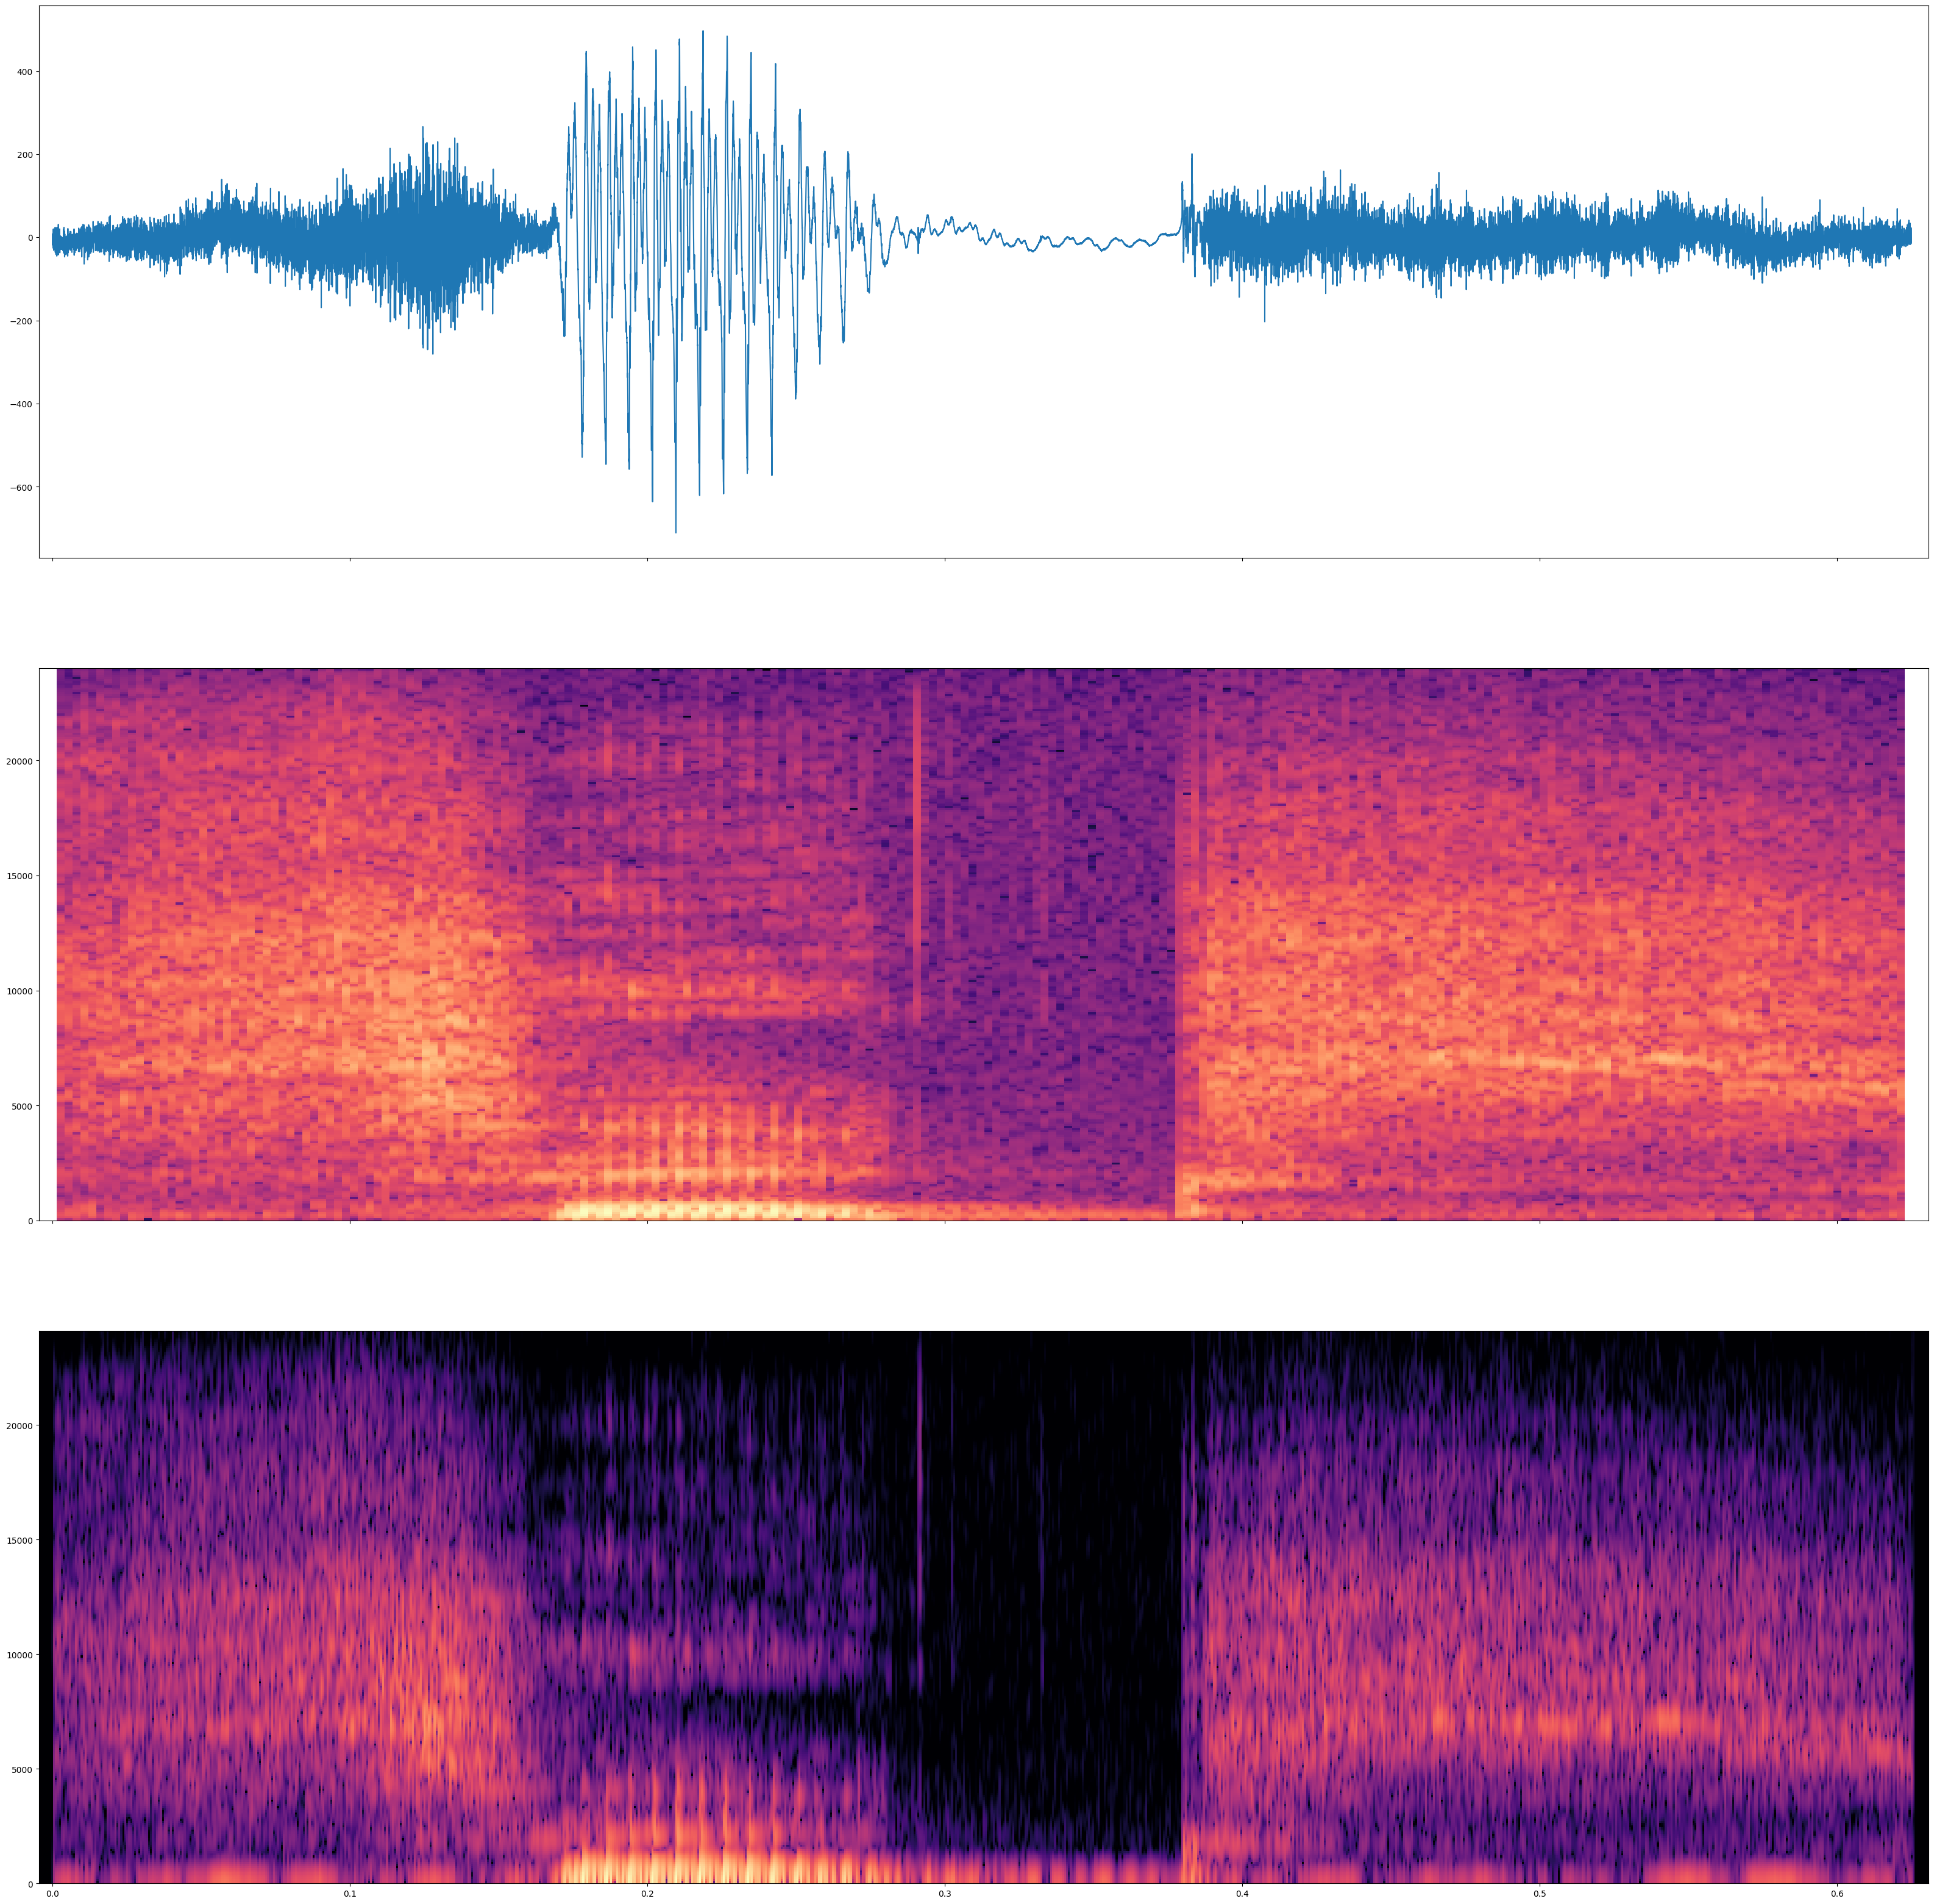

In [349]:
fig, (ax0, ax4, ax5) = plt.subplots(nrows=3, sharex=True)

ax0.plot(t, data_filtered)

# cutoff_low, cutoff_high = 50, 30

# data_filtered = savgol_filter(data, 40, 2)
# ax1.plot(t, data_filtered)


# b, a = butter(5, cutoff_low, fs=rate, analog=False)
# data_filtered = lfilter(b, a, x=data)
# ax2.plot(t, data_filtered)

# b, a = butter(5, cutoff_high, btype='high', fs=rate, analog=False)
# data_filtered = lfilter(b, a, x=data)
# ax3.plot(t, data_filtered)

# data_filtered = bandpass(data_filtered, [1, 50], rate)
# ax4.plot(t, data_filtered)

ax4.specgram(data_filtered, Fs=rate, scale='dB', pad_to=512, mode='psd', scale_by_freq=True, detrend='mean', cmap='magma')

win = gaussian(512, std=16, sym=True)  # symmetric Gaussian wind.
# win = hamming(512, sym=True)  # symmetric Gaussian wind.
# win = triang(150, sym=True)  # symmetric Gaussian wind.
SFT = ShortTimeFFT(win, hop=32, fs=rate, scale_to='psd')
Pxx = SFT.spectrogram(np.array(data_filtered))  # calculate absolute square of STFT
Pxx = 10 * np.log10(np.fmax(Pxx, 1e-5))  # limit range to -40 dB
im1 = ax5.imshow(Pxx, origin='lower', aspect='auto',
                 extent=SFT.extent(30_000), cmap='magma')

ax5.axis()
fig.set_figwidth(40)
fig.set_figheight(40)
# ax3.axis(ymin=0, ymax=750)
# ax4.axis(ymin=0, ymax=750)
# ax5.axis(ymin=0, ymax=750)
plt.show()

In [350]:
print(Pxx.max())
print(Pxx.shape)

23.060170910115122
(257, 953)


(257, 953)


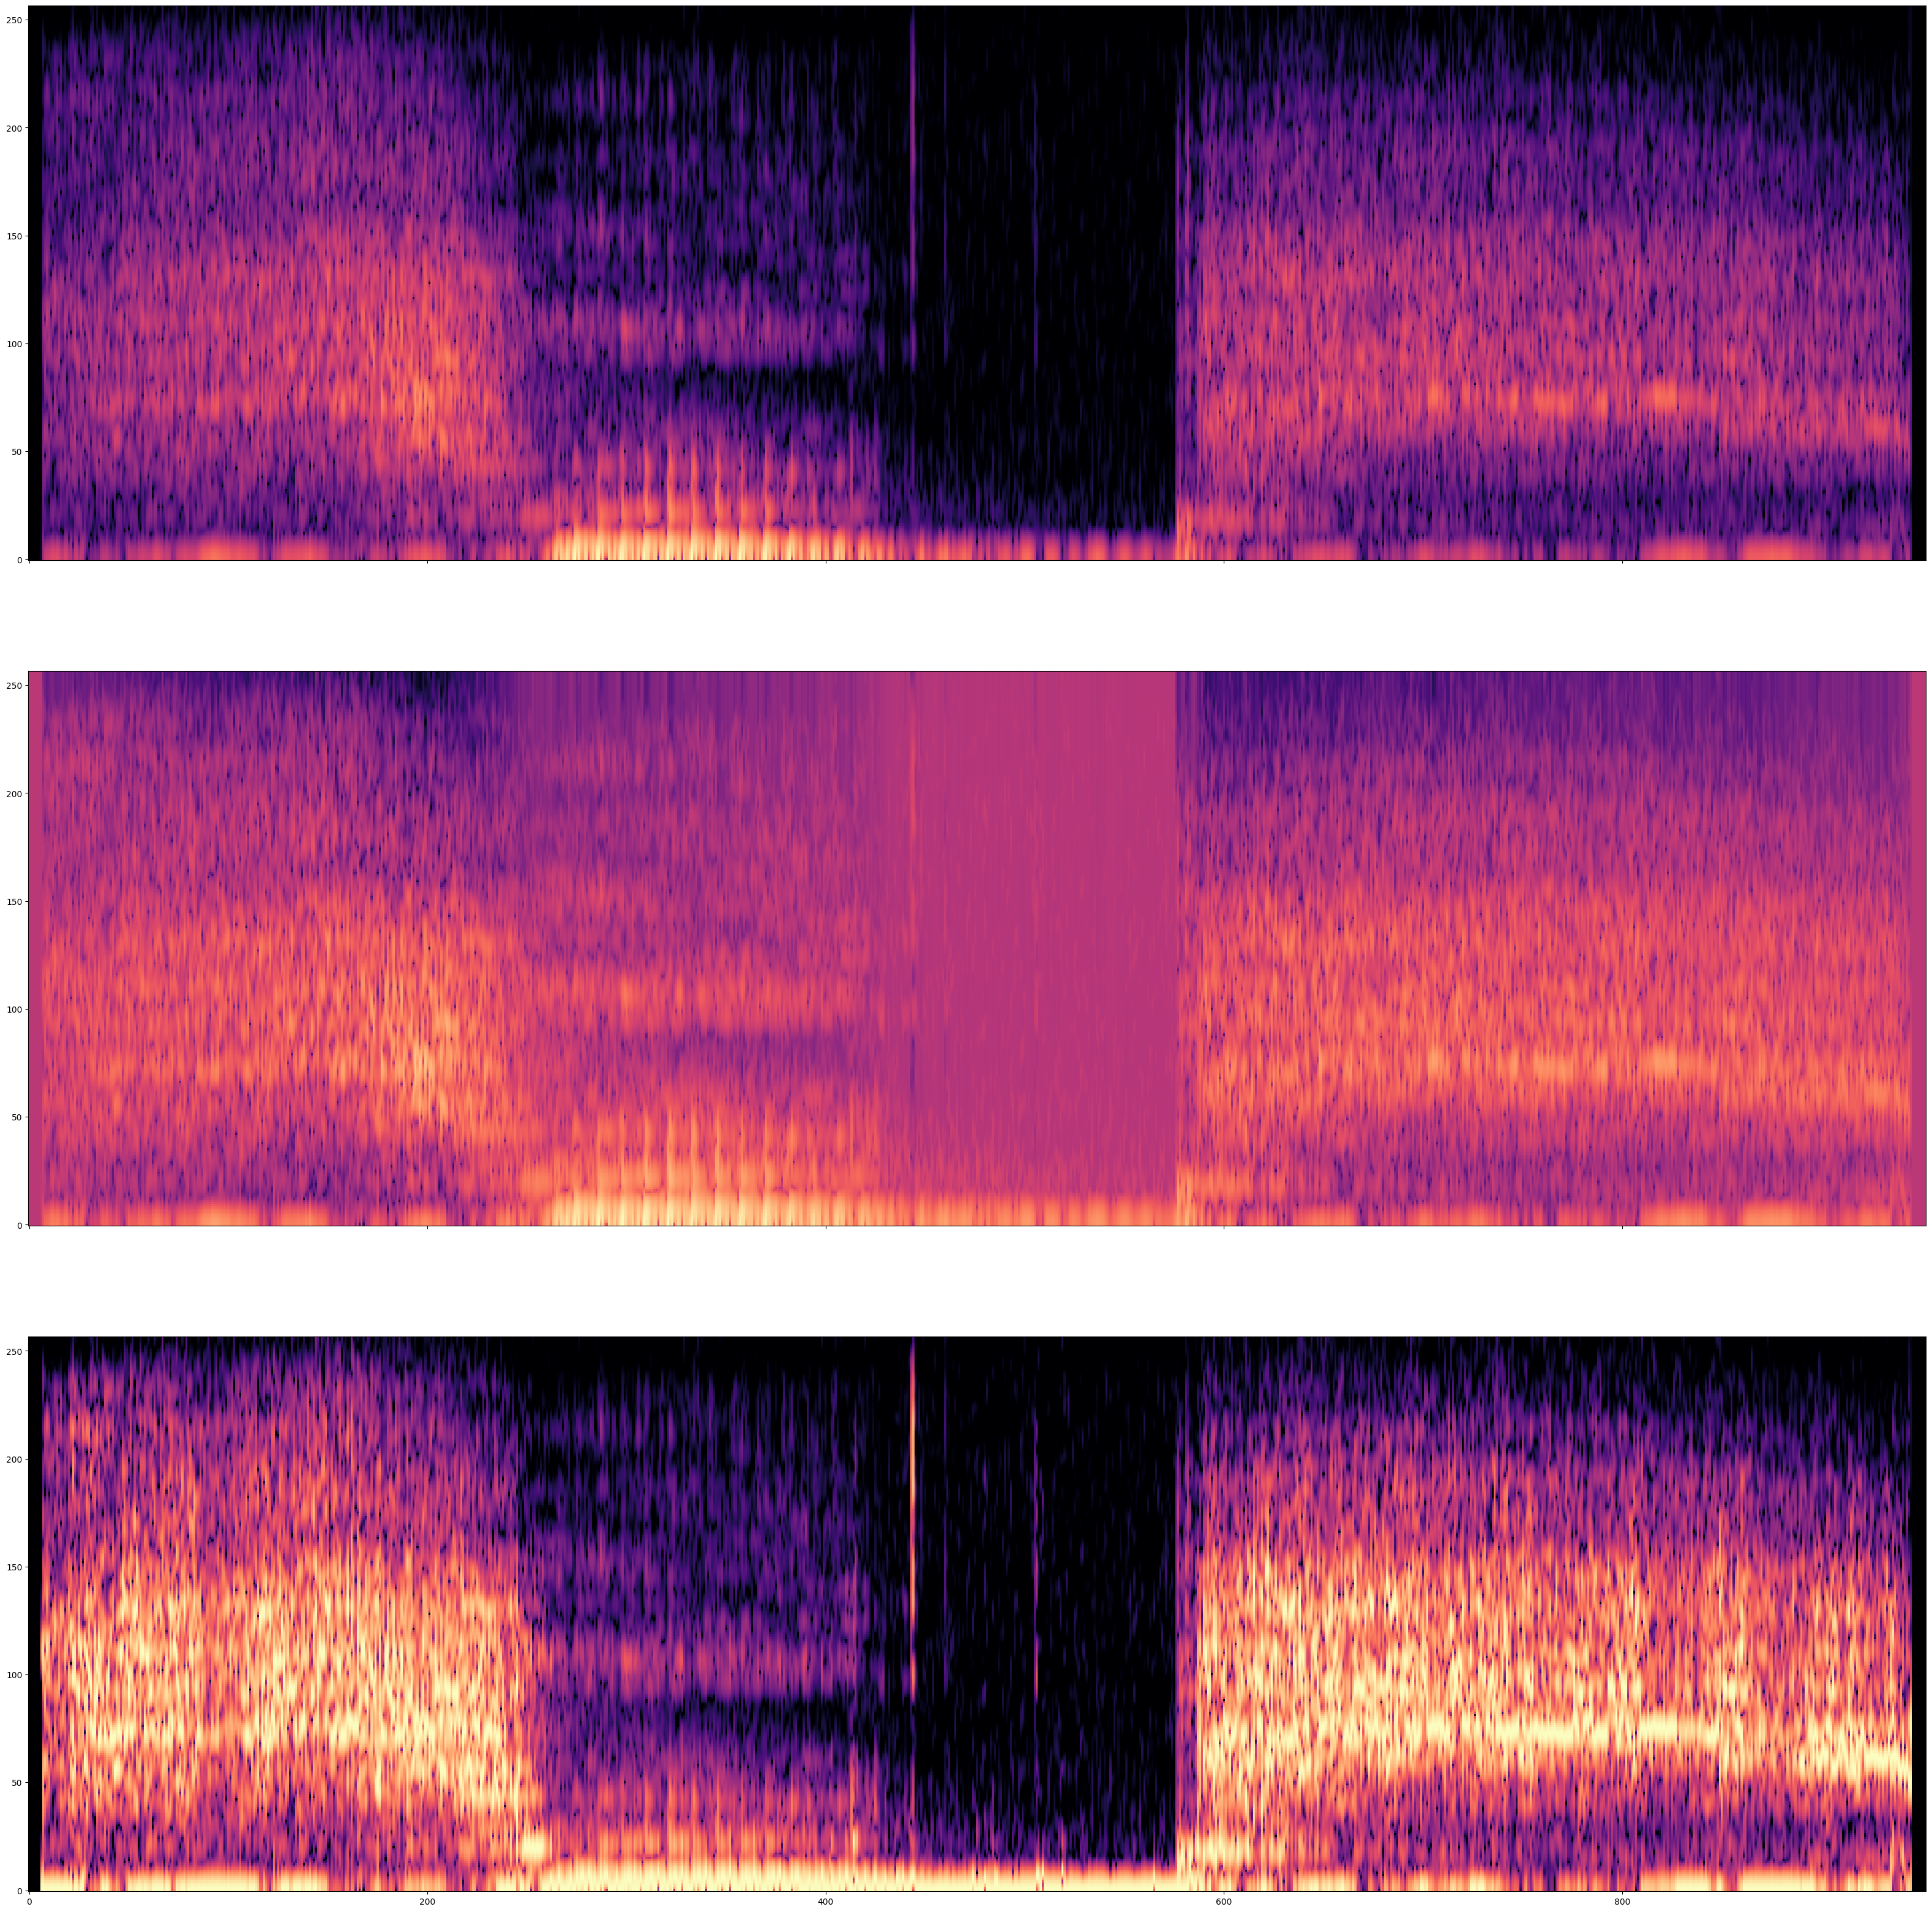

In [351]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True)

scalerR = RobustScaler()

# Pxx, freqs, bins, im = ax0.specgram(data_filtered, Fs=rate, scale='dB', pad_to=255, mode='psd', scale_by_freq=True, detrend='mean')
map1 = ax0.imshow(Pxx, origin='lower', aspect='auto', cmap='magma')

Pxx2 = normalize(Pxx, axis=0, norm='l1')
map2 = ax1.imshow(Pxx2, origin='lower', aspect='auto', cmap='magma')

scaler = MinMaxScaler()

Pxx3 = scaler.fit_transform(Pxx)
map3 = ax2.imshow(Pxx3, origin='lower', aspect='auto', cmap='magma')

# fig.set_figwidth(80)
# fig.set_figheight(20)
# ax0.axis(ymin=0, ymax=1)
# ax1.axis(ymin=0, ymax=1)
fig.set_figwidth(40)
fig.set_figheight(40)
print(Pxx.shape)

plt.show()

In [352]:
Pxx = np.array(Pxx)
print(Pxx3, len(Pxx3)) # элемент массива - амплитуды частот
print(Pxx.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 257
(257, 953)


In [353]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

Теперь нужно создавать такую спектрограмму для любого файла и паковать ее в трехмерный массив:

In [354]:

class SinglePatientData:
  def __init__(self, name : str, out : int):
    self.contents = name
    self.num = out

  def getTensor(self, path): # returns 129x1249x5 torch tensor
    if (hasattr(self, 'specgrams')):
      return self.specgrams
    else:
      with open(os.path.join(path, self.contents + '.wav'), 'rb') as f:
        read_file = f.read()
        f.close()
      data_pos = read_file.find(bytes('data', encoding='utf8')) + 8
      bits_per_sample = int.from_bytes(read_file[34:36], 'little')

      rate = int.from_bytes(read_file[24:28], 'little')
      data = [int.from_bytes(read_file[i:i+bits_per_sample//8], "little", signed=True) for i in range(data_pos, len(read_file), 2)]

      if(len(data) > 30_000):
        data = data[(len(data) - 30_000) // 2:30_000 + (len(data) - 30_000) // 2]
      elif (len(data) < 30_000):
        [data.append(0) for _ in range(30_000 - len(data))]

      scaler = MinMaxScaler()
      win = gaussian(512, std=16, sym=True)  # symmetric Gaussian wind.
      SFT = ShortTimeFFT(win, hop=32, fs=rate, scale_to='psd')
      Pxx = SFT.spectrogram(np.array(data))  # calculate absolute square of STFT
      Pxx = 10 * np.log10(np.fmax(Pxx, 1e-4))  # limit range to -40 dB
      Pxx = scaler.fit_transform(Pxx)
      self.specgrams = torch.from_numpy(np.array([Pxx], dtype='float32'))
      return self.specgrams
    

In [355]:
def createDataArray():
  retArray = []
  for i in range(10):
    for j in range(50):
      retArray.append(SinglePatientData(str(i) + '_01_' + str(j), i))
  return retArray

In [356]:
foldername = os.path.join('.', 'AudioMNIST', 'data', '01')

In [357]:
dataArray = createDataArray()

print(dataArray[0].contents)

0_01_0


torch.Size([257, 953])


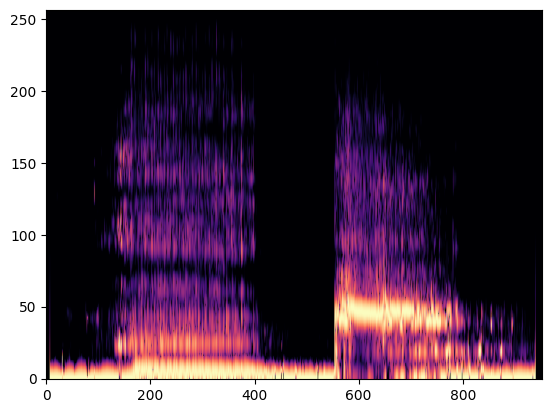

In [387]:
dataIterator = iter(dataArray)

fig, (ax0) = plt.subplots(nrows=1, sharex=True)
print(random.choice(dataArray).getTensor(foldername)[0].shape)
map3 = ax0.imshow(random.choice(dataArray).getTensor(foldername)[0], origin='lower', aspect='auto', cmap='magma')
plt.show()

Теперь можно приступать к созданию первой модели

In [359]:
print(torch.__version__)

2.5.1+cu124


In [397]:
class ConvModel(nn.Module):
    def __init__(self):
        super(ConvModel, self).__init__()

        # self.conv1 = nn.Conv2d(in_channels=7, out_channels=20, kernel_size=[3, 32], stride=2)
        # self.lin1 = nn.Linear(64 * 297 * 20, 5)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=4)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=2)
        self.pool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=2)
        self.pool3 = nn.MaxPool2d(2)
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=2)
        # self.pool4 = nn.MaxPool2d(2)
        self.conv5 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=2)
        self.conv6 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=2)
        self.pool6 = nn.MaxPool2d((2,11))
        self.conv7 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=2)
        self.pool7 = nn.MaxPool2d(7)
        self.lin8 = nn.Linear(in_features=64, out_features=64)
        self.lin9 = nn.Linear(in_features=64, out_features=10)

        self.linres = nn.Linear(in_features=238896, out_features=10)

        # self.lin6 = nn.Linear(in_features=448 * 6 * 37, out_features=448 * 6 * 37)
        # self.lin7 = nn.Linear(in_features=448 * 6 * 37, out_features=5)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)

        x = self.pool1(x)
        x = F.relu(x)

        x = self.conv2(x)
        x = F.relu(x)

        x = self.pool2(x)
        x = F.relu(x)

        # x = self.conv3(x)
        # x = F.relu(x)

        # x = self.pool3(x)
        # x = F.relu(x)

        # x = self.conv4(x)
        # x = F.relu(x)

        # x = self.conv5(x)
        # x = F.relu(x)

        # x = self.conv6(x)
        # x = F.relu(x)

        # x = self.pool6(x)
        # x = F.relu(x)

        # x = self.conv7(x)
        # x = F.relu(x)

        # x = self.pool7(x)
        # x = F.relu(x)

        x = x.flatten(0)

        # x = self.lin8(x)

        # x = self.lin9(x)

        x = self.linres(x)

        out = F.softmax(x, dim=0)
        return out

Тестовый прогон:

In [398]:
model = ConvModel()
Pxx = next(dataIterator).getTensor(foldername)
print(Pxx.shape)
out = model(Pxx)
print(out.shape)

torch.Size([1, 257, 953])
torch.Size([238896])


In [362]:
learning_rate = 0.001
num_epochs = 5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = ConvModel()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [363]:
def get_acc(logit, target):
    ''' Check if answer is right for training round '''
    acc = 0
    for i in range(len(logit)):
        acc += (1 - abs(logit[i] - target[i])).item()
    return acc / len(target)

In [364]:
train_acc = 0
epoch = 0
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    random.shuffle(dataArray)
    dataIterator = iter(dataArray)
    ## training step
    for i, patient in enumerate(dataIterator):
        # labels = torch.tensor([0 if i != patient.num else 1 for i in range(10)], dtype=torch.float32)
        # labels = torch.tensor([0 if i != 1 else 1 for i in range(10)], dtype=torch.float32)
        if(patient.num < 5):
            labels = torch.tensor([0 if i != 0 else 1 for i in range(10)], dtype=torch.float32)
        else: 
            labels = torch.tensor([0 if i != 1 else 1 for i in range(10)], dtype=torch.float32)

        Pxx = patient.getTensor(foldername);

        ## forward + backprop + loss
        logits = model(Pxx)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_acc(logits, labels)
        print(train_acc/(i+1), logits, labels)

    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i))

0.8199898183345795 tensor([0.1147, 0.0999, 0.0929, 0.0990, 0.0936, 0.0978, 0.1052, 0.0945, 0.1046,
        0.0979], grad_fn=<SoftmaxBackward0>) tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])
0.8202131718397141 tensor([0.1146, 0.1022, 0.0929, 0.0988, 0.0931, 0.0976, 0.1045, 0.0944, 0.1040,
        0.0979], grad_fn=<SoftmaxBackward0>) tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])
0.8211045006910961 tensor([0.1144, 0.1045, 0.0930, 0.0986, 0.0927, 0.0973, 0.1038, 0.0943, 0.1035,
        0.0977], grad_fn=<SoftmaxBackward0>) tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
0.8216305762529373 tensor([0.1160, 0.1061, 0.0929, 0.0982, 0.0922, 0.0969, 0.1032, 0.0941, 0.1029,
        0.0974], grad_fn=<SoftmaxBackward0>) tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
0.8215999746322632 tensor([0.1182, 0.1074, 0.0928, 0.0977, 0.0915, 0.0965, 0.1027, 0.0938, 0.1024,
        0.0971], grad_fn=<SoftmaxBackward0>) tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])
0.8216390371322633 tensor([0.1199, 